In [13]:
%%writefile Makefile

xschem:
# ifeq ($(REPLACE),1)
# 	rm -rf ./tools/xschem
# endif
# 	sudo apt install -y libx11-dev libxrender1 libxrender-dev libxcb1 libxaw7-dev \
# 						libx11-xcb-dev libcairo2 libcairo2-dev tcl8.6 tcl8.6-dev \
# 						tk8.6 tk8.6-dev flex bison libxpm4 libxpm-dev gawk adms \
# 						libreadline6-dev
	cd ./tools; \
	git clone https://github.com/StefanSchippers/xschem.git; \
	cd xschem; \
	./configure; \
	make; \
	sudo make install

# xschem_sky130:
# ifeq ($(REPLACE),1)
# 	rm -rf ./tools/xschem_library
# endif
# 	cd ./tools; \
# 	mkdir -p xschem_library; \
# 	cd xschem_library; \
# 	git clone git@github.com:StefanSchippers/xschem_sky130.git; \
# 	cd xschem_sky130; \
    
    
all: xschem xschem_sky130

Overwriting Makefile


In [2]:
import os
import pathlib
import sys

# !curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba

conda_prefix_path = pathlib.Path('conda-env')
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
sys.path.append(str(site_package_path.resolve()))
CONDA_PREFIX = str(conda_prefix_path.resolve())
PATH = os.environ['PATH']
LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}

# leads to error
# %env LD_LIBRARY_PATH={CONDA_PREFIX}/lib:{LD_LIBRARY_PATH}

# !bin/micromamba create --yes --prefix $CONDA_PREFIX
# !echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
# !bin/micromamba install --yes --prefix $CONDA_PREFIX \
#                         --channel litex-hub \
#                         --channel main \
#                         open_pdks.sky130a \
#                         magic \
#                         openroad \
#                         netgen \
#                         yosys 
# !bin/micromamba install --yes --prefix $CONDA_PREFIX --channel conda-forge tcllib gdstk pyyaml click

env: CONDA_PREFIX=/home/mariowei/notebooks/conda-env
env: PATH=/home/mariowei/notebooks/conda-env/bin:/home/mariowei/nolimits/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/usr/lib/wsl/lib:/mnt/c/windows/system32:/mnt/c/windows:/mnt/c/windows/System32/Wbem:/mnt/c/windows/System32/WindowsPowerShell/v1.0/:/mnt/c/windows/System32/OpenSSH/:/mnt/c/Users/mariowei/AppData/Local/Microsoft/WindowsApps:/mnt/c/Users/mariowei/AppData/Local/Programs/Microsoft VS Code/bin:/mnt/c/Users/mariowei/Anaconda3:/mnt/c/Users/mariowei/Anaconda3/Scripts/:/mnt/c/Users/mariowei/Anaconda3/Library/bin:/snap/bin


In [8]:
# setup proxy

%env http_proxy=http://proxy-chain.intel.com:911
%env https_proxy=http://proxy-chain.intel.com:911

env: http_proxy=http://proxy-chain.intel.com:911
env: https_proxy=http://proxy-chain.intel.com:911


In [10]:
!which ngspice

/home/mariowei/notebooks/conda-env/bin/ngspice


In [ ]:
%env PATH={CONDA_PREFIX}/bin:{PATH}

In [9]:
!bin/micromamba install --yes --prefix $CONDA_PREFIX --channel  conda-forge ngspice


                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/

[+] 0.0s
conda-forge/linux-64 ━━━━━━━━╸━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.0s[+] 0.1s
conda-forge/linux-64 ━━━━━━━━━╸━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
conda-forge/noarch   ━━━━╸━━━━━━━━━━━━━━━╸━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s[+] 0.2s
conda-forge/linux-64 ━━━━━━━━━━━╸━━━━━━━━━━━ 204.1kB /  ??.?MB @   1.2MB/s  0.2s
conda-forge/noarch   ━━━━━━╸━━━━━━━━━━━━━━━━ 214.0kB /  ??.?MB @   1.2MB/s  0.2s[+] 0.3s
conda-forge/linux-64 ━━━━━━━━━━━━━╸━━━━━━━━━ 631.2kB /  ??.?MB @   2.3MB/s  0.3s
conda-forge/noarch   ━━━━━━━━╸━━━━━━━━━━━━━━ 668.9kB /  ??.?MB @   2.4MB/s  0.3s[+] 0.4s
conda-forge/linux-64 ━━━━━━━━━━━━━━━╸━━━━━━━   1.0MB /  ??.?MB @   2.7MB/s  0.4s
conda-forge/noarch   ━━━━━━━━━━╸━━━━

In [4]:
!ngspice

/bin/bash: ngspice: command not found


In [2]:
# !git clone --depth=1 https://github.com/The-OpenROAD-Project/OpenLane

In [3]:
%%writefile inverter.v
module inverter(input wire in, output wire out);
    assign out = !in;
endmodule

Overwriting inverter.v


In [4]:
%%writefile config.tcl
set ::env(DESIGN_NAME) inverter

set ::env(VERILOG_FILES) "inverter.v"

set ::env(CLOCK_TREE_SYNTH) 0
set ::env(CLOCK_PORT) ""

set ::env(PL_RANDOM_GLB_PLACEMENT) 1

set ::env(FP_SIZING) absolute
set ::env(DIE_AREA) "0 0 50 50"
set ::env(PL_TARGET_DENSITY) 0.80


set ::env(FP_PDN_HORIZONTAL_HALO) 6
set ::env(FP_PDN_VERTICAL_HALO) 6

set ::env(DIODE_INSERTION_STRATEGY) 3

# disable version checks because we use conda packaged versions
set ::env(TEST_MISMATCHES) none
# disable klayout because of https://github.com/hdl/conda-eda/issues/175
set ::env(RUN_KLAYOUT) 0
# disable CVC because of https://github.com/hdl/conda-eda/issues/174
set ::env(RUN_CVC) 0

Overwriting config.tcl


In [5]:
import os
import pathlib
OPENLANE_ROOT=str(pathlib.Path('OpenLane').resolve())
PATH=os.environ['PATH']
%env PDK_ROOT={CONDA_PREFIX}/share/pdk
%env PDK=sky130A
%env STD_CELL_LIBRARY=sky130_fd_sc_hd
%env STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
%env TCLLIBPATH={CONDA_PREFIX}/lib/tcllib1.20
%env OPENLANE_ROOT={OPENLANE_ROOT}
%env PATH={PATH}:{OPENLANE_ROOT}:{OPENLANE_ROOT}/scripts
%env OPENLANE_LOCAL_INSTALL=1
!flow.tcl -design .

env: PDK_ROOT=/home/mariowei/notebooks/conda-env/share/pdk
env: PDK=sky130A
env: STD_CELL_LIBRARY=sky130_fd_sc_hd
env: STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
env: TCLLIBPATH=/home/mariowei/notebooks/conda-env/lib/tcllib1.20
env: OPENLANE_ROOT=/home/mariowei/notebooks/OpenLane
env: PATH=/home/mariowei/notebooks/conda-env/bin:/home/mariowei/nolimits/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/usr/lib/wsl/lib:/mnt/c/windows/system32:/mnt/c/windows:/mnt/c/windows/System32/Wbem:/mnt/c/windows/System32/WindowsPowerShell/v1.0/:/mnt/c/windows/System32/OpenSSH/:/mnt/c/Users/mariowei/AppData/Local/Microsoft/WindowsApps:/mnt/c/Users/mariowei/AppData/Local/Programs/Microsoft VS Code/bin:/mnt/c/Users/mariowei/Anaconda3:/mnt/c/Users/mariowei/Anaconda3/Scripts/:/mnt/c/Users/mariowei/Anaconda3/Library/bin:/snap/bin:/home/mariowei/notebooks/OpenLane:/home/mariowei/notebooks/OpenLane/scripts
env: OPENLANE_LOCAL_INSTALL=1
OpenLane 94521291e39eb5895aceb059b6

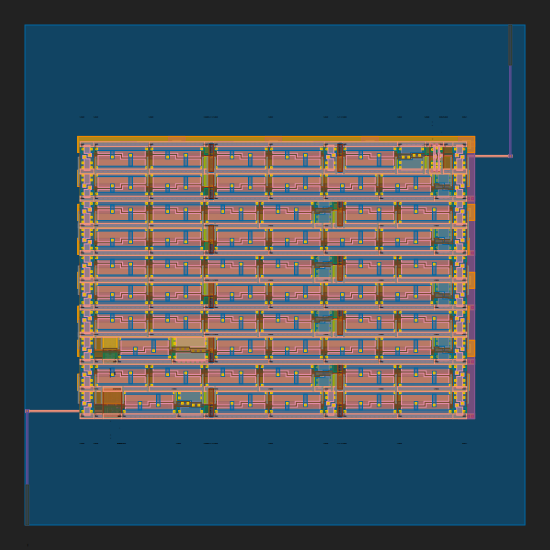

In [8]:
import pathlib
import gdstk
import IPython.display

gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('inverter.svg')
IPython.display.SVG('inverter.svg')